In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# Loading Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_input_img(i):
  plt.imshow(X_train[i], cmap='binary')
  plt.title(y_train[i])
  plt.show()

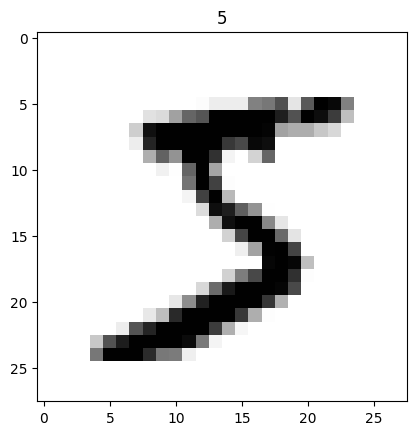

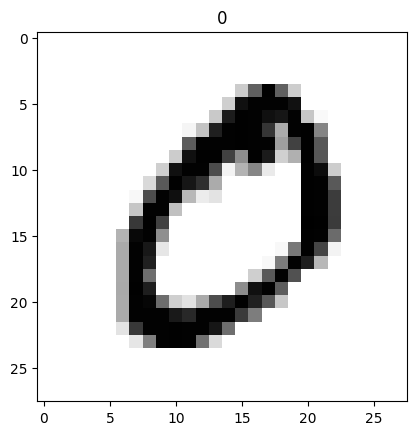

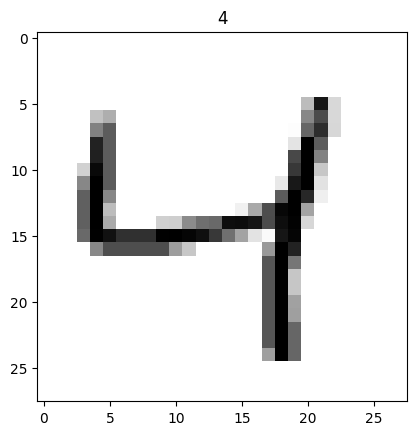

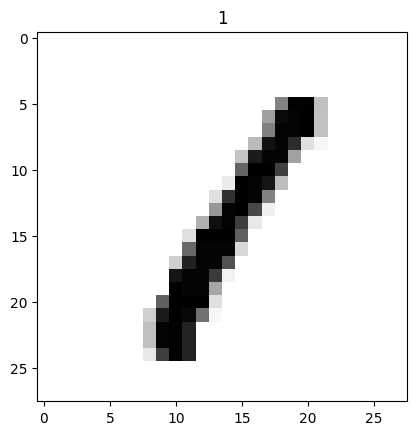

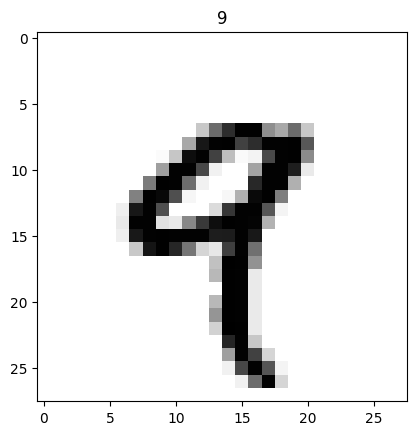

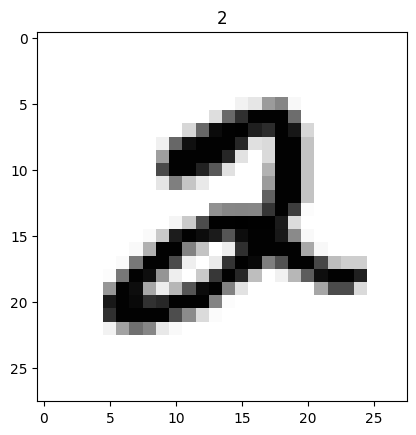

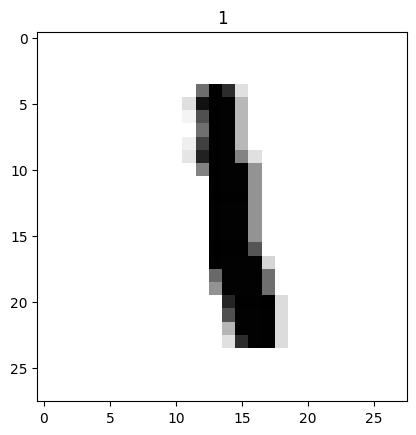

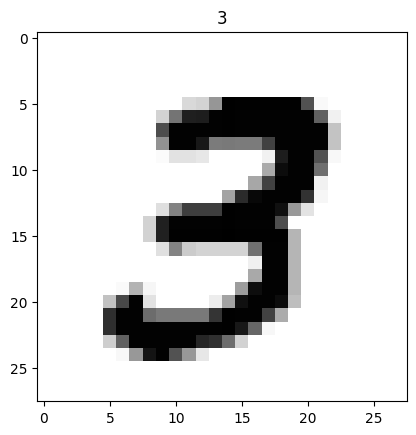

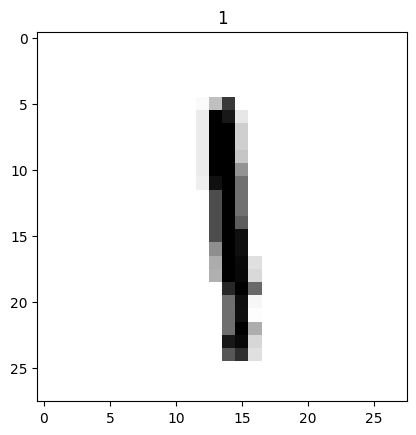

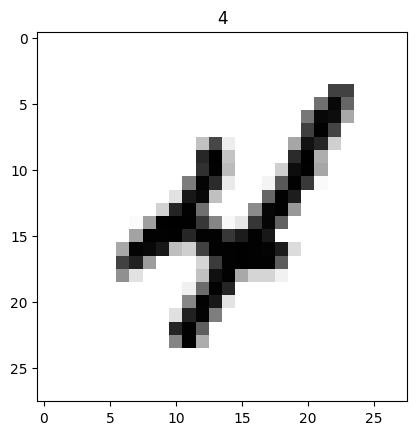

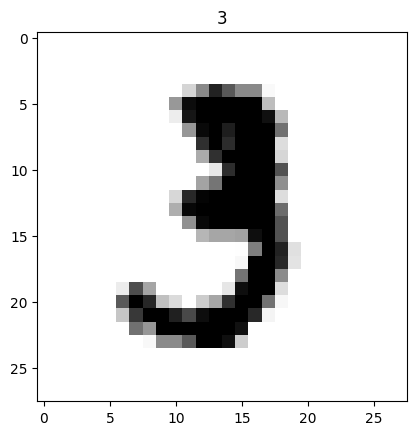

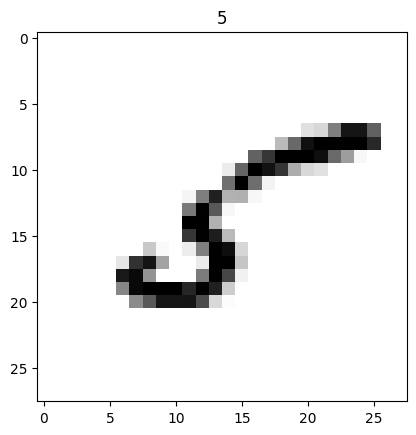

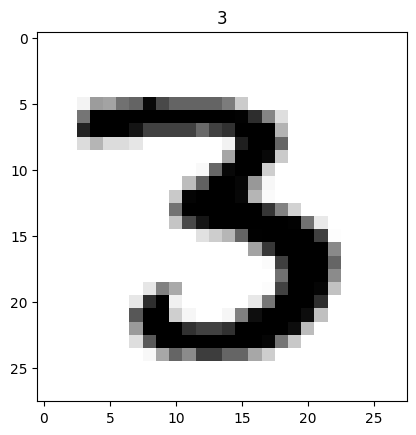

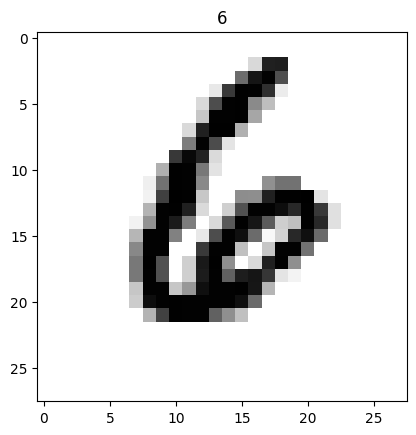

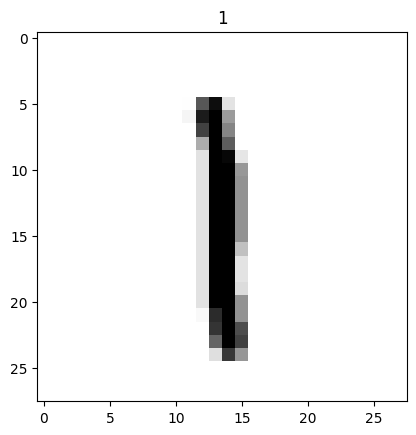

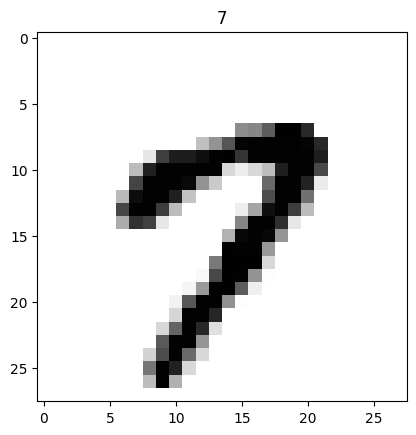

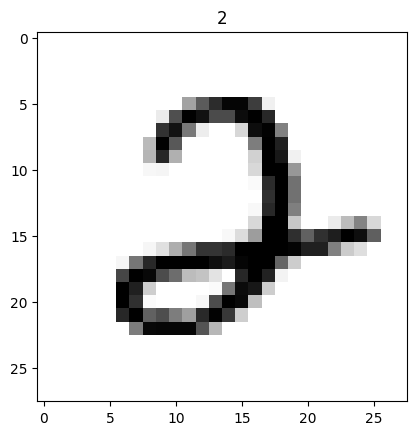

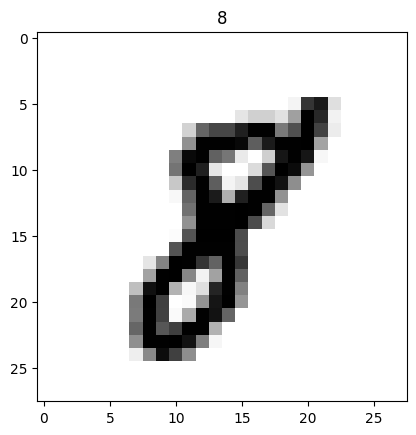

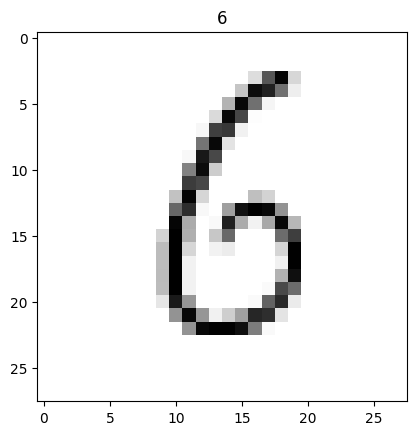

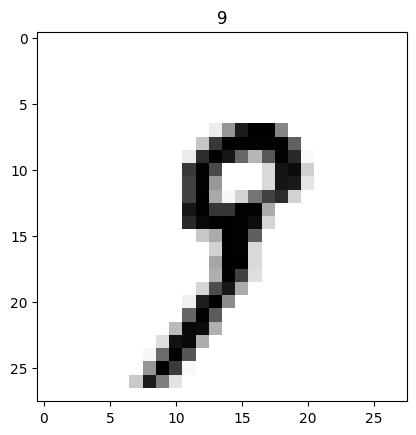

In [6]:
for i in range(20):
  plot_input_img(i)

# Pre Processing the Dataset

In [ ]:
# Normalizing the image [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Reshaping the dataset
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Converting the classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Building the Model

In [ ]:
model = Sequential()

model.add(keras.layers.Input(shape=(28, 28, 1)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))    # to prevent overfitting

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1, mode='max')

# Model Checkpoint
mc = ModelCheckpoint('./bestmodel.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

# Training Model

In [ ]:
his = model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0043
Epoch 1: val_accuracy did not improve from 0.99067
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9985 - loss: 0.0043 - val_accuracy: 0.9904 - val_loss: 0.0586
Epoch 2/50
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0028
Epoch 2: val_accuracy did not improve from 0.99067
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9895 - val_loss: 0.0654
Epoch 3/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0051
Epoch 3: val_accuracy did not improve from 0.99067
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9899 - val_loss: 0.0611
Epoch 4/50
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9990 - loss: 0.0030
Epoch 4: val_accuracy did not improve from 0.99067
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accu

In [ ]:
model_S = keras.models.load_model("//content//bestmodel.h5")

In [ ]:
score = model_S.evaluate(X_test, y_test)

print(f"The accuracy of the model is {score[1]}.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0487
The accuracy of the model is 0.9930999875068665.
